# Predicción del precio de un coche.


- **Objetivo**

    Crear un modelo predictivo que sea capaz de predecir el valor de un coche de segunda mano en españa.
    Cuidado, va a ser la primera vex que vais a trabajar con un set de datos medianamente grande.

- **Entregable.**

    Un script de python en el que se me soliciten los datos de mi coche y que me devuelva el valor de mi coche.

- **Valorables.**

    Cuanto mas grande sea la precisión y mas facil de usar sea para el usuario(yo).

### Y poco mas... 😄 A por todas y seguid asiiii, que vais genial 🙌🙌🙌
### Animo 🚀🚀

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns
import time
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings("ignore")

# EDA

In [2]:
df = pd.read_csv("./data/coches-de-segunda-mano-sample.csv")
df.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


In [3]:
df.tail()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
49995,730210734bfbe1d3df878d5df71246f2,9881bcdd5a0ad4733037b3fb25e69c3a,HYUNDAI,i30,HYUNDAI i30 1.4 TGDI Tecno Fastback DCT 5p.,18490,16490.0,Gasolina,2018.0,47000,...,5,Automático,Gris / Plata,26,True,Flexicar Málaga,Málaga,Spain,2020-11-24 19:59:52,2021-01-15 00:00:00
49996,732b04fb47dd9559dbdcd099c5af484e,9881bcdd5a0ad4733037b3fb25e69c3a,RENAULT,Laguna,RENAULT Laguna Coupe Limited 2.0 Energy dCi 15...,14500,13551.0,Diésel,2015.0,68750,...,2,Manual,KNG Gris Casiopea (metalizado),30,True,Ocasion Plus,Málaga,Spain,2021-01-13 17:02:41,2021-01-15 00:00:00
49997,c10afb53957fb8012707239bdfa66018,9881bcdd5a0ad4733037b3fb25e69c3a,PEUGEOT,108,PEUGEOT 108 TOP Allure VTi 52kW 72CV 5p.,11000,9000.0,Gasolina,2019.0,21422,...,5,Manual,Gris / Plata,17,True,Psa Retail Huelva,Huelva,Spain,2021-01-08 16:47:24,2021-01-15 00:00:00
49998,f74363a6688ba11b71b4d980a959b8d3,9881bcdd5a0ad4733037b3fb25e69c3a,AUDI,RS4,AUDI RS4 Avant 4.2 FSI 450cv quattro 5p.,47900,NaN,Gasolina,2013.0,47900,...,5,Automático,Gris / Plata (Antracita),20,True,Codigocar Lugo,Lugo,Spain,2021-01-13 16:22:53,2021-01-15 00:00:00
49999,3d60801ccb96ef038747130e8a34ceda,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C2,CITROEN C2 1.4 HDI VTR Plus 3p.,2790,NaN,Diésel,2006.0,106000,...,3,Manual,Negro,21,True,AUTOVALENCIA 19,Barcelona,Spain,2021-01-10 16:32:41,2021-01-15 00:00:00


In [4]:
df.insert_date.unique() # es la fecha de extracción de la info

array(['2021-01-15 00:00:00'], dtype=object)

In [5]:
df['extract_year'] = pd.to_datetime(df.insert_date).dt.year

cols_2_del = ['url', 'company', 'insert_date', 'price_financed', 'color', 'dealer']

df = df.drop(columns=cols_2_del, axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             49998 non-null  object 
 1   model            49995 non-null  object 
 2   version          50000 non-null  object 
 3   price            50000 non-null  int64  
 4   fuel             49954 non-null  object 
 5   year             49998 non-null  float64
 6   kms              50000 non-null  int64  
 7   power            41472 non-null  float64
 8   doors            50000 non-null  int64  
 9   shift            49889 non-null  object 
 10  photos           50000 non-null  int64  
 11  is_professional  50000 non-null  bool   
 12  province         49994 non-null  object 
 13  country          50000 non-null  object 
 14  publish_date     50000 non-null  object 
 15  extract_year     50000 non-null  int32  
dtypes: bool(1), float64(2), int32(1), int64(4), object(8)
memo

In [7]:
df.describe()

,price,year,kms,power,doors,photos,extract_year
count,50000.000000,49998.000000,5.000000e+04,41472.000000,50000.000000,50000.000000,50000.0
mean,15166.270260,2012.311032,1.163591e+05,146.396388,4.505380,16.199120,2021.0
std,16485.669747,6.677760,1.072921e+05,71.283964,0.868001,12.422882,0.0
min,300.000000,1970.000000,0.000000e+00,29.000000,2.000000,0.000000,2021.0
25%,5500.000000,2007.000000,3.830000e+04,109.000000,4.000000,7.000000,2021.0
50%,11750.000000,2015.000000,9.999900e+04,130.000000,5.000000,13.000000,2021.0
75%,19800.000000,2018.000000,1.749000e+05,163.000000,5.000000,23.000000,2021.0
max,549900.000000,2021.000000,5.000000e+06,800.000000,5.000000,54.000000,2021.0


## A ver esos NaNs


### make

In [8]:
df[df.make.isna()]

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year
5659,NaN,D2S,D2S 27kW 3p.,21495,Eléctrico,2021.0,3,37.0,3,Automático,16,True,Burgos,Spain,2021-01-13 18:35:29,2021
47381,NaN,D2S,D2S 27kW 3p.,21495,Eléctrico,2021.0,6,37.0,3,Automático,15,True,Burgos,Spain,2021-01-13 18:35:29,2021


In [9]:
df[df.make.isna()].index

Index([5659, 47381], dtype='int64')

In [10]:
df.loc[df['make'].isna(), 'make'] ='INVICTA'

In [11]:
df.iloc[[5659, 47381]]

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year
5659,INVICTA,D2S,D2S 27kW 3p.,21495,Eléctrico,2021.0,3,37.0,3,Automático,16,True,Burgos,Spain,2021-01-13 18:35:29,2021
47381,INVICTA,D2S,D2S 27kW 3p.,21495,Eléctrico,2021.0,6,37.0,3,Automático,15,True,Burgos,Spain,2021-01-13 18:35:29,2021


### model

In [12]:
df[df.model.isna()]

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year
1330,SEAT,NaN,SEAT Cordoba 5p.,1850,Diésel,2004.0,248000,NaN,5,Manual,6,False,Córdoba,Spain,2021-01-03 22:14:05,2021
25574,SEAT,NaN,SEAT Toledo 4p.,1100,Diésel,2002.0,369000,NaN,4,Manual,4,False,Toledo,Spain,2020-12-04 15:40:26,2021
31826,SEAT,NaN,SEAT,2400,Diésel,2008.0,370000,NaN,5,Manual,4,False,Toledo,Spain,2020-12-23 08:51:44,2021
32831,SEAT,NaN,SEAT Leon 5p.,3500,Diésel,2003.0,333000,NaN,5,Manual,5,False,León,Spain,2020-11-30 17:20:22,2021
37683,SEAT,NaN,SEAT Toledo 1.9 TDI STELLA 110CV 4p.,860,Diésel,1999.0,367963,110.0,4,Manual,12,True,Toledo,Spain,2020-12-01 09:44:58,2021


In [13]:
# df.iloc[31826]

In [14]:
#  como hay registros NaN en modelo 5 ([1330, 25574, 31826, 32831, 37683]) los actualizamos
df.loc[df['model'].isna(), 'model'] = df['version'].str.split().str[1]


In [15]:
#  hay registros NaN en modelo 31826
df[df.model.isna()]

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year
31826,SEAT,NaN,SEAT,2400,Diésel,2008.0,370000,NaN,5,Manual,4,False,Toledo,Spain,2020-12-23 08:51:44,2021


In [16]:
def rellenar_model(row):
    if pd.isna(row['model']):
        filtro = (
            (df['make'] == row['make']) &
            (df['version'] == row['version']) &
            (df['year'] == row['year']) &
            (df['doors'] == row['doors']) &
            (df['fuel'] == row['fuel']) &
            (df['shift'] == row['shift']) &
            df['model'].notna()
        )
        moda = df.loc[filtro, 'model'].mode()
        if not moda.empty:
            return moda[0]
    return row['model']

df['model'] = df.apply(rellenar_model, axis=1)


In [17]:
df.iloc[31826]

make                              SEAT
model                             León
version                           SEAT
price                             2400
fuel                            Diésel
year                            2008.0
kms                             370000
power                              NaN
doors                                5
shift                           Manual
photos                               4
is_professional                  False
province                        Toledo
country                          Spain
publish_date       2020-12-23 08:51:44
extract_year                      2021
Name: 31826, dtype: object

In [18]:
# df.iloc[[1330, 25574, 31826, 32831, 37683]]

In [19]:
#  hay registros NaN en year
df.model.isna().sum()

np.int64(0)

### fuel

In [20]:
df.fuel.isna().sum()

np.int64(46)

In [21]:
df[(df.fuel.isna()) & (df.make == 'BMW')]

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year
1921,BMW,Serie 6,BMW Serie 6 2p.,17000,NaN,2008.0,180000,NaN,2,Automático,0,False,Barcelona,Spain,2020-11-26 19:32:19,2021
12912,BMW,Serie 3,BMW,7800,NaN,2001.0,370000,NaN,3,Manual,9,False,Alicante,Spain,2020-10-29 15:28:14,2021
23507,BMW,Serie 5,BMW,6500,NaN,2007.0,211000,NaN,5,Automático,0,False,Madrid,Spain,2020-12-09 00:29:34,2021


In [22]:
df[(df.model == 'Serie 6') & (df.make == 'BMW') & (df.doors == 2) & (df.year == 2008) & (df['shift'] == 'Automático')]['fuel'].value_counts(dropna=True)

fuel
Diésel      5
Gasolina    2
Name: count, dtype: int64

In [23]:
def rellenar_fuel(row):
    if pd.isna(row['fuel']):
        filtro = (
            (df['model'] == row['model']) &
            (df['make'] == row['make']) &
            (df['doors'] == row['doors']) &
            (df['year'] == row['year']) &
            (df['shift'] == row['shift']) &
            df['fuel'].notna()
        )
        moda = df.loc[filtro, 'fuel'].mode()
        if not moda.empty:
            return moda[0]
    return row['fuel']

df['fuel'] = df.apply(rellenar_fuel, axis=1)


In [24]:
print("NaNs restantes en fuel:", df['fuel'].isna().sum())


NaNs restantes en fuel: 7


In [25]:
df[df.fuel.isna()]


,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year
3896,RENAULT,Kangoo,RENAULT,7000,NaN,2012.0,44000,NaN,5,Automático,4,False,Tenerife,Spain,2021-01-06 19:37:06,2021
13696,LEXUS,NX,LEXUS NX 5p.,25000,NaN,2014.0,200000,NaN,5,Automático,5,False,Barcelona,Spain,2020-12-31 07:20:16,2021
21345,PEUGEOT,Partner,PEUGEOT Partner 3p.,16500,NaN,2019.0,45,NaN,3,Automático,8,True,Málaga,Spain,2021-01-09 19:28:11,2021
29797,TOYOTA,Prius+,TOYOTA,3500,NaN,2010.0,427000,NaN,5,Automático,0,False,Madrid,Spain,2020-10-29 15:44:37,2021
38139,TOYOTA,Prius+,TOYOTA,8800,NaN,2013.0,165271,NaN,5,Automático,4,False,Tenerife,Spain,2020-12-29 15:20:26,2021
39683,RENAULT,Twizy,RENAULT Twizy 2p.,4500,NaN,2012.0,39390,NaN,2,Automático,6,False,Cádiz,Spain,2021-01-03 12:54:45,2021
49130,INFINITI,Q50,INFINITI,27900,NaN,2014.0,24500,NaN,5,Automático,1,False,Murcia,Spain,2020-12-30 14:56:56,2021


In [26]:
# relajo la condicion quitando el anio ya que me quedan 7 registros con NaNs
def rellenar_fuel(row):
    if pd.isna(row['fuel']):
        filtro = (
            (df['model'] == row['model']) &
            (df['make'] == row['make']) &
            (df['doors'] == row['doors']) &
            (df['shift'] == row['shift']) &
            df['fuel'].notna()
        )
        moda = df.loc[filtro, 'fuel'].mode()
        if not moda.empty:
            return moda[0]
    return row['fuel']

df['fuel'] = df.apply(rellenar_fuel, axis=1)


In [27]:
print("NaNs restantes en fuel:", df['fuel'].isna().sum())


NaNs restantes en fuel: 3


In [28]:
df[df.fuel.isna()]


,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year
3896,RENAULT,Kangoo,RENAULT,7000,NaN,2012.0,44000,NaN,5,Automático,4,False,Tenerife,Spain,2021-01-06 19:37:06,2021
39683,RENAULT,Twizy,RENAULT Twizy 2p.,4500,NaN,2012.0,39390,NaN,2,Automático,6,False,Cádiz,Spain,2021-01-03 12:54:45,2021
49130,INFINITI,Q50,INFINITI,27900,NaN,2014.0,24500,NaN,5,Automático,1,False,Murcia,Spain,2020-12-30 14:56:56,2021


In [29]:
# relajo la condicion quitando el anio, shift 
def rellenar_fuel(row):
    if pd.isna(row['fuel']):
        filtro = (
            (df['model'] == row['model']) &
            (df['make'] == row['make']) &
            (df['doors'] == row['doors']) &
            df['fuel'].notna()
        )
        moda = df.loc[filtro, 'fuel'].mode()
        if not moda.empty:
            return moda[0]
    return row['fuel']

df['fuel'] = df.apply(rellenar_fuel, axis=1)

In [30]:
df[(df.model == 'Q50') & (df.make == 'INFINITI')]

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year
842,INFINITI,Q50,INFINITI Q50 2.2D Q DESIGN AUTO 4p.,13950,Diésel,2015.0,135000,170.0,4,Automático,20,True,Toledo,Spain,2021-01-03 18:16:49,2021
7996,INFINITI,Q50,INFINITI Q50 2.2D AUTO 4p.,14390,Diésel,2014.0,129990,170.0,4,Automático,35,True,Madrid,Spain,2021-01-10 18:40:40,2021
9418,INFINITI,Q50,INFINITI Q50 2.2D GT PREMIUM AUTO 4p.,16990,Diésel,2016.0,68483,170.0,4,Automático,43,True,Barcelona,Spain,2020-12-18 19:32:33,2021
15641,INFINITI,Q50,INFINITI Q50 2.2D GT PREMIUM AUTO 4p.,16990,Diésel,2015.0,68483,170.0,4,Automático,43,True,Madrid,Spain,2021-01-01 14:28:47,2021
17280,INFINITI,Q50,INFINITI Q50 2.2d PREMIUM Auto 4p.,21190,Diésel,2018.0,44450,170.0,4,Automático,39,True,Madrid,Spain,2020-12-30 09:23:39,2021
19636,INFINITI,Q50,INFINITI Q50 3.5 Hybrid SPORT Auto 4p.,29900,Híbrido,2019.0,16100,364.0,4,Automático,14,True,Las Palmas,Spain,2021-01-14 19:07:53,2021
20782,INFINITI,Q50,INFINITI Q50 2.2D AUTO 4p.,18500,Diésel,2015.0,45177,170.0,4,Automático,19,True,La Rioja,Spain,2020-12-26 13:54:49,2021
26698,INFINITI,Q50,INFINITI Q50 2.2d GT PREMIUM Aut. 7V 4p.,21000,Diésel,2017.0,35229,170.0,4,Automático,11,True,La Rioja,Spain,2020-11-01 13:13:26,2021
28413,INFINITI,Q50,INFINITI Q50 2.2D 4p.,16900,Diésel,2015.0,72999,170.0,4,Manual,17,True,Málaga,Spain,2021-01-07 13:18:42,2021
29171,INFINITI,Q50,INFINITI Q50 2.2d GT PREMIUM Aut. 7V 4p.,19950,Diésel,2017.0,49000,170.0,4,Automático,37,True,Madrid,Spain,2020-11-06 13:17:30,2021


In [31]:
# relajo la condicion quitando el anio, shift, doors
def rellenar_fuel(row):
    if pd.isna(row['fuel']):
        filtro = (
            (df['model'] == row['model']) &
            (df['make'] == row['make']) &
            df['fuel'].notna()
        )
        moda = df.loc[filtro, 'fuel'].mode()
        if not moda.empty:
            return moda[0]
    return row['fuel']

df['fuel'] = df.apply(rellenar_fuel, axis=1)

In [32]:
df[(df.fuel.isna())]

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year
39683,RENAULT,Twizy,RENAULT Twizy 2p.,4500,NaN,2012.0,39390,NaN,2,Automático,6,False,Cádiz,Spain,2021-01-03 12:54:45,2021


In [33]:
# relajo la condicion quitando el anio, shift, doors, model
def rellenar_fuel(row):
    if pd.isna(row['fuel']):
        filtro = (
            (df['make'] == row['make']) &
            df['fuel'].notna()
        )
        moda = df.loc[filtro, 'fuel'].mode()
        if not moda.empty:
            return moda[0]
    return row['fuel']

df['fuel'] = df.apply(rellenar_fuel, axis=1)

In [34]:
df[(df.model == 'Twizy') & (df.make == 'RENAULT')]

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year
39683,RENAULT,Twizy,RENAULT Twizy 2p.,4500,Diésel,2012.0,39390,NaN,2,Automático,6,False,Cádiz,Spain,2021-01-03 12:54:45,2021


In [35]:
df[(df.fuel.isna())]


,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year


### year

In [36]:
df[(df.year.isna())]


,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year
31025,KIA,Stonic,KIA Stonic 1.0 TGDi 74kW 100CV Concept 5p.,16850,Gasolina,NaN,1,100.0,5,Manual,15,True,Sevilla,Spain,2020-12-19 12:41:17,2021
42075,SEAT,Arona,SEAT Arona 1.0 TSI 85kW 115CV Xcellence Ecomot...,22500,Gasolina,NaN,1,115.0,5,Manual,14,True,Sevilla,Spain,2020-12-19 12:41:43,2021


AL tener _km = 1_ asumo que es coche del mismo año de la publicación; para no borrarlo

In [37]:
df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')
df['year'] = df['year'].fillna(df['publish_date'].dt.year)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   make             50000 non-null  object        
 1   model            50000 non-null  object        
 2   version          50000 non-null  object        
 3   price            50000 non-null  int64         
 4   fuel             50000 non-null  object        
 5   year             50000 non-null  float64       
 6   kms              50000 non-null  int64         
 7   power            41472 non-null  float64       
 8   doors            50000 non-null  int64         
 9   shift            49889 non-null  object        
 10  photos           50000 non-null  int64         
 11  is_professional  50000 non-null  bool          
 12  province         49994 non-null  object        
 13  country          50000 non-null  object        
 14  publish_date     50000 non-null  datet

### power

NaNs: 8528

In [39]:
df[(df.power.isna())].head()

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year
0,SEAT,Toledo,SEAT Toledo 4p.,950,Diésel,2000.0,227000,NaN,4,Manual,5,False,Navarra,Spain,2020-12-18 10:47:13,2021
11,VOLKSWAGEN,Golf,VOLKSWAGEN Golf 3p.,1700,Diésel,1990.0,350000,NaN,3,Manual,4,False,Guipúzcoa,Spain,2021-01-11 10:28:19,2021
16,BMW,Serie 3,BMW Serie 3 5p.,4200,Diésel,2005.0,240000,NaN,5,Automático,7,False,Jaén,Spain,2020-12-10 06:44:17,2021
18,MAZDA,Mazda5,MAZDA,5100,Diésel,2009.0,189500,NaN,5,Manual,0,False,Madrid,Spain,2020-11-05 16:28:01,2021
19,BMW,Serie 1,BMW,5900,Diésel,2009.0,129000,NaN,3,Manual,0,False,Alicante,Spain,2020-11-23 01:06:49,2021


In [41]:
def rellenar_power_flexible(row):
    if pd.isna(row['power']):
        criterios = [
            ['make', 'model', 'version', 'fuel', 'year', 'doors', 'shift'],
            ['make', 'model', 'fuel', 'year', 'doors'],
            ['make', 'model', 'fuel'],
            ['make', 'model']
        ]
        for columnas in criterios:
            filtro = (df['power'].notna())
            for col in columnas:
                filtro &= df[col] == row[col]
            moda = df.loc[filtro, 'power'].mode()
            if not moda.empty:
                return moda[0]
    return row['power']

df['power'] = df.apply(rellenar_power_flexible, axis=1)


In [42]:
# df[(df.power.isna())]
df.power.isna().sum()


np.int64(110)

In [44]:
df[df.power.isna()]

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year
257,MERCEDES-BENZ,400,MERCEDES-BENZ,2650,Diésel,2003.0,245000,NaN,5,Manual,0,False,Barcelona,Spain,2020-12-11 12:43:21,2021
430,MG,ZT,MG ZT 5p.,1200,Gasolina,2004.0,128000,NaN,5,Manual,7,False,Toledo,Spain,2021-01-01 11:50:55,2021
553,SKODA,Octavia Tour,SKODA Octavia Tour 5p.,3500,Diésel,2008.0,227000,NaN,5,Manual,0,False,Madrid,Spain,2020-11-19 17:11:15,2021
733,SEAT,Malaga,SEAT Malaga 5p.,7000,Diésel,1980.0,258000,NaN,5,Manual,0,False,Murcia,Spain,2020-12-14 10:58:01,2021
1330,SEAT,Cordoba,SEAT Cordoba 5p.,1850,Diésel,2004.0,248000,NaN,5,Manual,6,False,Córdoba,Spain,2021-01-03 22:14:05,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47270,SAAB,9-3X,SAAB 93X 5p.,1200,Diésel,1998.0,360000,NaN,5,Manual,2,False,Cantabria,Spain,2021-01-10 15:29:58,2021
47379,OPEL,Ascona,OPEL Ascona 4p.,4500,Gasolina,1974.0,160000,NaN,4,Manual,3,False,Vizcaya,Spain,2021-01-11 05:44:25,2021
47556,OPEL,Calibra,OPEL Calibra 3p.,4900,Gasolina,1992.0,236000,NaN,3,Manual,0,False,Barcelona,Spain,2020-11-09 18:43:41,2021
49160,MAZDA,Tribute,MAZDA,3000,Gasolina,2003.0,290000,NaN,5,Manual,5,False,Sevilla,Spain,2020-12-22 11:35:56,2021


In [45]:
df[(df['make']== 'MERCEDES-BENZ') & (df.model == '400')]

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year
257,MERCEDES-BENZ,400,MERCEDES-BENZ,2650,Diésel,2003.0,245000,NaN,5,Manual,0,False,Barcelona,Spain,2020-12-11 12:43:21,2021
25647,MERCEDES-BENZ,400,MERCEDES-BENZ 400 5p.,4999,Diésel,1999.0,289663,NaN,5,Automático,1,False,Baleares,Spain,2020-12-11 07:52:17,2021


In [46]:
df['power'] = df['power'].fillna(df.groupby('make')['power'].transform('median'))

Los más especialitos de la familia :D. A  estos les vamos a asignar la _mediana_ global

In [47]:
df[df.power.isna()]

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year
5302,VAZ,111 Stawra,VAZ 111 Stawra 5p.,500,Gasolina,2004.0,114000,NaN,5,Manual,2,False,Lleida,Spain,2020-12-04 21:18:59,2021
18467,LADA,Niva,LADA,2800,Gasolina,1999.0,98000,NaN,3,Manual,0,False,Tarragona,Spain,2020-10-05 16:47:25,2021
33987,ARO,10,ARO 10 5p.,1000,Gasolina,2004.0,17000,NaN,5,Manual,3,False,Córdoba,Spain,2020-12-06 12:37:14,2021
45791,LADA,Niva,LADA Niva 5p.,7000,Diésel,2002.0,86000,NaN,5,Manual,9,False,Castellón,Spain,2020-12-11 11:33:21,2021


In [48]:
df['power'] = df['power'].fillna(df['power'].median())

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   make             50000 non-null  object        
 1   model            50000 non-null  object        
 2   version          50000 non-null  object        
 3   price            50000 non-null  int64         
 4   fuel             50000 non-null  object        
 5   year             50000 non-null  float64       
 6   kms              50000 non-null  int64         
 7   power            50000 non-null  float64       
 8   doors            50000 non-null  int64         
 9   shift            49889 non-null  object        
 10  photos           50000 non-null  int64         
 11  is_professional  50000 non-null  bool          
 12  province         49994 non-null  object        
 13  country          50000 non-null  object        
 14  publish_date     50000 non-null  datet

### shift

NaNs: 111

In [50]:
def shift(row):
    if pd.isna(row['shift']):
        criterios = [
            # ['make', 'model', 'version', 'fuel', 'year', 'doors', 'power'],
            ['make', 'model', 'fuel', 'year', 'doors'],
            ['make', 'model', 'fuel'],
            ['make', 'model']
        ]
        for columnas in criterios:
            filtro = (df['shift'].notna())
            for col in columnas:
                filtro &= df[col] == row[col]
            moda = df.loc[filtro, 'shift'].mode()
            if not moda.empty:
                return moda[0]
    return row['shift']

df['shift'] = df.apply(shift, axis=1)


In [51]:
df['shift'].isna().sum()

np.int64(0)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   make             50000 non-null  object        
 1   model            50000 non-null  object        
 2   version          50000 non-null  object        
 3   price            50000 non-null  int64         
 4   fuel             50000 non-null  object        
 5   year             50000 non-null  float64       
 6   kms              50000 non-null  int64         
 7   power            50000 non-null  float64       
 8   doors            50000 non-null  int64         
 9   shift            50000 non-null  object        
 10  photos           50000 non-null  int64         
 11  is_professional  50000 non-null  bool          
 12  province         49994 non-null  object        
 13  country          50000 non-null  object        
 14  publish_date     50000 non-null  datet

## Float 2 Int

In [53]:
df.select_dtypes(exclude='object').info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            50000 non-null  int64         
 1   year             50000 non-null  float64       
 2   kms              50000 non-null  int64         
 3   power            50000 non-null  float64       
 4   doors            50000 non-null  int64         
 5   photos           50000 non-null  int64         
 6   is_professional  50000 non-null  bool          
 7   publish_date     50000 non-null  datetime64[ns]
 8   extract_year     50000 non-null  int32         
dtypes: bool(1), datetime64[ns](1), float64(2), int32(1), int64(4)
memory usage: 2.9 MB


In [54]:
df.year = df.year.astype(int)
df.power = df.power.astype(int)

In [55]:
df.select_dtypes(exclude='object').info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            50000 non-null  int64         
 1   year             50000 non-null  int64         
 2   kms              50000 non-null  int64         
 3   power            50000 non-null  int64         
 4   doors            50000 non-null  int64         
 5   photos           50000 non-null  int64         
 6   is_professional  50000 non-null  bool          
 7   publish_date     50000 non-null  datetime64[ns]
 8   extract_year     50000 non-null  int32         
dtypes: bool(1), datetime64[ns](1), int32(1), int64(6)
memory usage: 2.9 MB


## Obj 2 Nº

In [56]:
df.select_dtypes(include='object').info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   make      50000 non-null  object
 1   model     50000 non-null  object
 2   version   50000 non-null  object
 3   fuel      50000 non-null  object
 4   shift     50000 non-null  object
 5   province  49994 non-null  object
 6   country   50000 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB


### make

quitamos los min/max agrupamos por media de precio y ordenamos de (-) a (+)

In [57]:
df.head()

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year
0,SEAT,Toledo,SEAT Toledo 4p.,950,Diésel,2000,227000,110,4,Manual,5,False,Navarra,Spain,2020-12-18 10:47:13,2021
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,Gasolina,2017,50071,82,5,Manual,6,True,Tenerife,Spain,2021-01-02 11:25:40,2021
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,Diésel,2016,103000,100,4,Manual,10,True,Barcelona,Spain,2020-12-16 10:51:45,2021
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,Diésel,2014,120000,140,4,Manual,9,True,Navarra,Spain,2020-11-25 11:09:14,2021
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,Diésel,2017,107000,130,2,Manual,4,True,Sevilla,Spain,2021-01-12 20:00:34,2021


In [58]:
df.price.describe()

count     50000.000000
mean      15166.270260
std       16485.669747
min         300.000000
25%        5500.000000
50%       11750.000000
75%       19800.000000
max      549900.000000
Name: price, dtype: float64

In [59]:
df[df.price == 549900.000000]

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year
29617,LAMBORGHINI,Aventador,LAMBORGHINI Aventador 6.5 V12 LP 7204 50 Anniv...,549900,Gasolina,2014,270,720,2,Automático,48,True,Málaga,Spain,2020-12-18 13:24:40,2021


In [60]:
df[df.price == 300.000000]

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year
3778,CITROEN,Xantia,CITROEN Xantia 5p.,300,Gasolina,1997,190000,71,5,Manual,0,False,Tarragona,Spain,2021-01-14 21:11:21,2021
5119,SEAT,Ibiza,SEAT Ibiza 1.4i 16v 100 CV STELLA 5p.,300,Gasolina,2002,70000,100,5,Manual,9,False,Albacete,Spain,2020-12-02 10:08:33,2021
9175,FORD,Mondeo,FORD,300,Diésel,1996,246000,150,5,Manual,0,False,Salamanca,Spain,2020-12-07 17:45:20,2021
14050,OPEL,Vectra,OPEL Vectra Elegance 2.2 16v 4p.,300,Gasolina,2003,90000,147,4,Manual,1,False,Barcelona,Spain,2020-11-15 09:51:41,2021
15963,FORD,Escort,FORD,300,Gasolina,1998,190000,90,5,Manual,0,False,Tenerife,Spain,2020-12-06 10:33:52,2021
17313,CITROEN,Saxo,CITROEN Saxo 3p.,300,Gasolina,1996,353335,60,3,Manual,0,False,Tenerife,Spain,2021-01-11 15:48:31,2021
21320,FORD,Fiesta,FORD Fiesta 5p.,300,Diésel,1995,49000,68,5,Manual,0,False,Ávila,Spain,2020-11-20 14:46:12,2021
22914,OPEL,Astra,OPEL,300,Diésel,2002,240000,100,3,Manual,0,False,Cádiz,Spain,2020-11-15 11:57:54,2021
23336,SEAT,Córdoba,SEAT,300,Gasolina,1998,200000,75,5,Manual,1,False,Tenerife,Spain,2020-12-16 10:38:32,2021
26254,VOLKSWAGEN,Beetle,VOLKSWAGEN Beetle 5p.,300,Gasolina,2000,100000,105,5,Manual,0,False,Baleares,Spain,2020-11-21 09:03:31,2021


In [61]:
# Clipping de los min/max en lugar de filtrar (al filtrar perdia unas 5 marcas de camino)
df['price_clipped'] = df['price'].clip(lower=df['price'].quantile(0.05),
                                       upper=df['price'].quantile(0.95))

precio_medio = df.groupby('make')['price_clipped'].mean().sort_values()

# codifico las marcas segun el precio medio por marca
codificacion_marcas = {marca: idx for idx, marca in enumerate(precio_medio.index)}
df['make_encoded'] = df['make'].map(codificacion_marcas)


In [62]:
df.tail()

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year,price_clipped,make_encoded
49995,HYUNDAI,i30,HYUNDAI i30 1.4 TGDI Tecno Fastback DCT 5p.,18490,Gasolina,2018,47000,140,5,Automático,26,True,Málaga,Spain,2020-11-24 19:59:52,2021,18490.00,39
49996,RENAULT,Laguna,RENAULT Laguna Coupe Limited 2.0 Energy dCi 15...,14500,Diésel,2015,68750,150,2,Manual,30,True,Málaga,Spain,2021-01-13 17:02:41,2021,14500.00,20
49997,PEUGEOT,108,PEUGEOT 108 TOP Allure VTi 52kW 72CV 5p.,11000,Gasolina,2019,21422,72,5,Manual,17,True,Huelva,Spain,2021-01-08 16:47:24,2021,11000.00,29
49998,AUDI,RS4,AUDI RS4 Avant 4.2 FSI 450cv quattro 5p.,47900,Gasolina,2013,47900,450,5,Automático,20,True,Lugo,Spain,2021-01-13 16:22:53,2021,39201.15,48
49999,CITROEN,C2,CITROEN C2 1.4 HDI VTR Plus 3p.,2790,Diésel,2006,106000,70,3,Manual,21,True,Barcelona,Spain,2021-01-10 16:32:41,2021,2790.00,21


In [63]:
df.make_encoded = df.make_encoded.astype(int)

### model

In [64]:
df.model.nunique()

942

In [65]:
model_target_mean = df.groupby('model')['price'].mean()
df['model_encoded'] = df['model'].map(model_target_mean)

In [66]:
df[df.model.isna()]

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year,price_clipped,make_encoded,model_encoded


In [67]:
df.head()

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional,province,country,publish_date,extract_year,price_clipped,make_encoded,model_encoded
0,SEAT,Toledo,SEAT Toledo 4p.,950,Diésel,2000,227000,110,4,Manual,5,False,Navarra,Spain,2020-12-18 10:47:13,2021,1500.0,24,3381.575758
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,Gasolina,2017,50071,82,5,Manual,6,True,Tenerife,Spain,2021-01-02 11:25:40,2021,6200.0,21,8477.349206
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,Diésel,2016,103000,100,4,Manual,10,True,Barcelona,Spain,2020-12-16 10:51:45,2021,7851.0,25,10119.781818
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,Diésel,2014,120000,140,4,Manual,9,True,Navarra,Spain,2020-11-25 11:09:14,2021,19426.0,37,24402.591549
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,Diésel,2017,107000,130,2,Manual,4,True,Sevilla,Spain,2021-01-12 20:00:34,2021,22850.0,25,11089.415094


### fuel

In [68]:
df.fuel.nunique()

7

In [69]:
df.fuel.unique()

array(['Diésel', 'Gasolina', 'Híbrido enchufable', 'Eléctrico',
       'Gas natural (CNG)', 'Híbrido', 'Gas licuado (GLP)'], dtype=object)

In [70]:
fuel_dummies = pd.get_dummies(df['fuel'], prefix='fuel')
df = pd.concat([df.drop('fuel', axis=1), fuel_dummies], axis=1)
df.head()


,make,model,version,price,year,kms,power,doors,shift,photos,...,price_clipped,make_encoded,model_encoded,fuel_Diésel,fuel_Eléctrico,fuel_Gas licuado (GLP),fuel_Gas natural (CNG),fuel_Gasolina,fuel_Híbrido,fuel_Híbrido enchufable
0,SEAT,Toledo,SEAT Toledo 4p.,950,2000,227000,110,4,Manual,5,...,1500.0,24,3381.575758,True,False,False,False,False,False,False
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,2017,50071,82,5,Manual,6,...,6200.0,21,8477.349206,False,False,False,False,True,False,False
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,2016,103000,100,4,Manual,10,...,7851.0,25,10119.781818,True,False,False,False,False,False,False
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,2014,120000,140,4,Manual,9,...,19426.0,37,24402.591549,True,False,False,False,False,False,False
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,2017,107000,130,2,Manual,4,...,22850.0,25,11089.415094,True,False,False,False,False,False,False


### shift

In [71]:
df['shift'].nunique()

2

In [72]:
le = LabelEncoder()
df['shift_encoded'] = le.fit_transform(df['shift'])
df.head()

,make,model,version,price,year,kms,power,doors,shift,photos,...,make_encoded,model_encoded,fuel_Diésel,fuel_Eléctrico,fuel_Gas licuado (GLP),fuel_Gas natural (CNG),fuel_Gasolina,fuel_Híbrido,fuel_Híbrido enchufable,shift_encoded
0,SEAT,Toledo,SEAT Toledo 4p.,950,2000,227000,110,4,Manual,5,...,24,3381.575758,True,False,False,False,False,False,False,1
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,2017,50071,82,5,Manual,6,...,21,8477.349206,False,False,False,False,True,False,False,1
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,2016,103000,100,4,Manual,10,...,25,10119.781818,True,False,False,False,False,False,False,1
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,2014,120000,140,4,Manual,9,...,37,24402.591549,True,False,False,False,False,False,False,1
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,2017,107000,130,2,Manual,4,...,25,11089.415094,True,False,False,False,False,False,False,1


In [73]:
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   make      50000 non-null  object
 1   model     50000 non-null  object
 2   version   50000 non-null  object
 3   shift     50000 non-null  object
 4   province  49994 non-null  object
 5   country   50000 non-null  object
dtypes: object(6)
memory usage: 2.3+ MB


In [74]:
df.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   price                    50000 non-null  int64         
 1   year                     50000 non-null  int64         
 2   kms                      50000 non-null  int64         
 3   power                    50000 non-null  int64         
 4   doors                    50000 non-null  int64         
 5   photos                   50000 non-null  int64         
 6   is_professional          50000 non-null  bool          
 7   publish_date             50000 non-null  datetime64[ns]
 8   extract_year             50000 non-null  int32         
 9   price_clipped            50000 non-null  float64       
 10  make_encoded             50000 non-null  int64         
 11  model_encoded            50000 non-null  float64       
 12  fuel_Diésel              50000 n

In [75]:
df.describe()

,price,year,kms,power,doors,photos,publish_date,extract_year,price_clipped,make_encoded,model_encoded,shift_encoded
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000,50000.0,50000.000000,50000.000000,50000.000000,50000.000000
mean,15166.270260,2012.311340,1.163591e+05,143.001860,4.505380,16.199120,2020-12-21 17:22:53.292480,2021.0,13992.411000,36.043480,15166.270260,0.695360
min,300.000000,1970.000000,0.000000e+00,29.000000,2.000000,0.000000,2017-05-09 14:56:20,2021.0,1500.000000,0.000000,300.000000,0.000000
25%,5500.000000,2007.000000,3.830000e+04,105.000000,4.000000,7.000000,2020-12-10 21:08:38,2021.0,5500.000000,24.000000,8439.614314,0.000000
50%,11750.000000,2015.000000,9.999900e+04,130.000000,5.000000,13.000000,2020-12-30 16:17:31,2021.0,11750.000000,37.000000,12359.228070,1.000000
75%,19800.000000,2018.000000,1.749000e+05,154.000000,5.000000,23.000000,2021-01-09 21:27:41.750000128,2021.0,19800.000000,47.000000,18584.414141,1.000000
max,549900.000000,2021.000000,5.000000e+06,800.000000,5.000000,54.000000,2021-01-15 12:40:51,2021.0,39201.150000,75.000000,347225.000000,1.000000
std,16485.669747,6.677803,1.072921e+05,68.331476,0.868001,12.422882,NaN,0.0,10447.584963,12.935157,12636.721634,0.460259


### col Antiguedad años

In [76]:
df['anios_antiguedad'] = df['extract_year'] - df['year']

In [77]:
df_original = df.copy()

In [78]:
df_numeric = df.select_dtypes(include='number')
df_numeric.head()

,price,year,kms,power,doors,photos,extract_year,price_clipped,make_encoded,model_encoded,shift_encoded,anios_antiguedad
0,950,2000,227000,110,4,5,2021,1500.0,24,3381.575758,1,21
1,6200,2017,50071,82,5,6,2021,6200.0,21,8477.349206,1,4
2,7851,2016,103000,100,4,10,2021,7851.0,25,10119.781818,1,5
3,19426,2014,120000,140,4,9,2021,19426.0,37,24402.591549,1,7
4,22850,2017,107000,130,2,4,2021,22850.0,25,11089.415094,1,4


In [79]:
df_numeric.columns.values

array(['price', 'year', 'kms', 'power', 'doors', 'photos', 'extract_year',
       'price_clipped', 'make_encoded', 'model_encoded', 'shift_encoded',
       'anios_antiguedad'], dtype=object)

# MODELANDO

In [146]:
df_parc_no = df[['price', 'kms', 'power', 'doors', 'photos',
       'make_encoded', 'model_encoded', 'shift_encoded',
       'anios_antiguedad']]

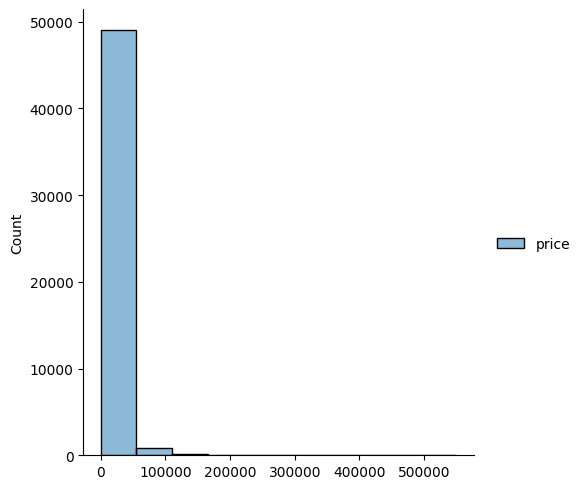

In [147]:
sns.displot(df_parc_no[['price']], bins=10)

In [148]:
# sns.pairplot(df, kind='reg', diag_kind='hist', plot_kws={"line_kws": {"color": "red"}});

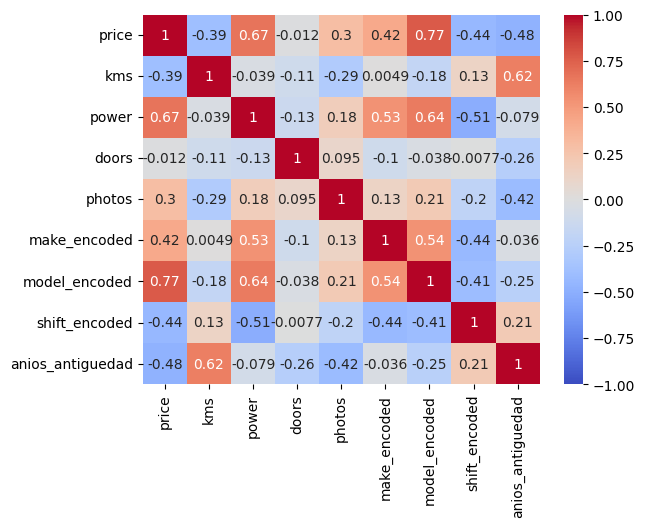

In [149]:
sns.heatmap(df_parc_no.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin= -1, vmax=1);

In [150]:
df_parc_no.drop(columns=['doors', 'photos'], axis=1, inplace=True)
df_parc_no.head()

,price,kms,power,make_encoded,model_encoded,shift_encoded,anios_antiguedad
0,950,227000,110,24,3381.575758,1,21
1,6200,50071,82,21,8477.349206,1,4
2,7851,103000,100,25,10119.781818,1,5
3,19426,120000,140,37,24402.591549,1,7
4,22850,107000,130,25,11089.415094,1,4


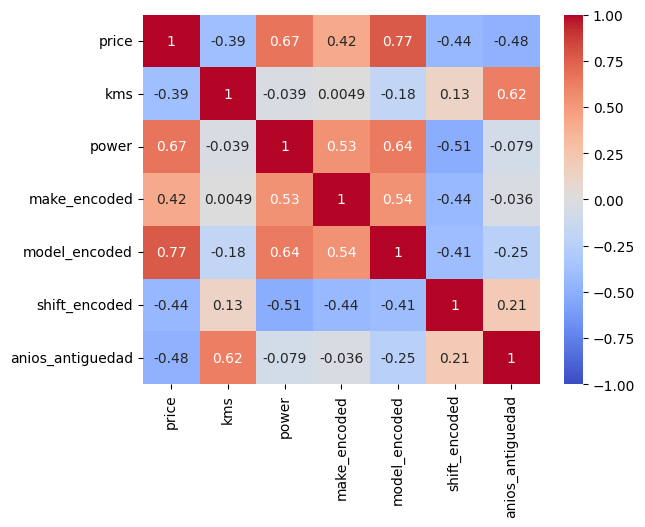

In [151]:
sns.heatmap(df_parc_no.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin= -1, vmax=1);

In [152]:
df_parc_no.describe()

,price,kms,power,make_encoded,model_encoded,shift_encoded,anios_antiguedad
count,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,15166.270260,1.163591e+05,143.001860,36.043480,15166.270260,0.695360,8.688660
std,16485.669747,1.072921e+05,68.331476,12.935157,12636.721634,0.460259,6.677803
min,300.000000,0.000000e+00,29.000000,0.000000,300.000000,0.000000,0.000000
25%,5500.000000,3.830000e+04,105.000000,24.000000,8439.614314,0.000000,3.000000
50%,11750.000000,9.999900e+04,130.000000,37.000000,12359.228070,1.000000,6.000000
75%,19800.000000,1.749000e+05,154.000000,47.000000,18584.414141,1.000000,14.000000
max,549900.000000,5.000000e+06,800.000000,75.000000,347225.000000,1.000000,51.000000


In [153]:
df_parc_no.columns.values

array(['price', 'kms', 'power', 'make_encoded', 'model_encoded',
       'shift_encoded', 'anios_antiguedad'], dtype=object)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   make                     50000 non-null  object        
 1   model                    50000 non-null  object        
 2   version                  50000 non-null  object        
 3   price                    50000 non-null  int64         
 4   year                     50000 non-null  int64         
 5   kms                      50000 non-null  int64         
 6   power                    50000 non-null  int64         
 7   doors                    50000 non-null  int64         
 8   shift                    50000 non-null  object        
 9   photos                   50000 non-null  int64         
 10  is_professional          50000 non-null  bool          
 11  province                 49994 non-null  object        
 12  country                  50000 n

## Data train/ splitting

In [154]:
df_parc_no.head()

,price,kms,power,make_encoded,model_encoded,shift_encoded,anios_antiguedad
0,950,227000,110,24,3381.575758,1,21
1,6200,50071,82,21,8477.349206,1,4
2,7851,103000,100,25,10119.781818,1,5
3,19426,120000,140,37,24402.591549,1,7
4,22850,107000,130,25,11089.415094,1,4


In [155]:
X = df_parc_no.iloc[:, 1:]
y = df_parc_no['price']

In [156]:
X.columns.values

array(['kms', 'power', 'make_encoded', 'model_encoded', 'shift_encoded',
       'anios_antiguedad'], dtype=object)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print("Total features shape:", X.shape)
print("X Train features shape:", X_train.shape)
print("y Train target shape:", y_train.shape)
print("X Test features shape:", X_test.shape)
print("y Test target shape:", y_test.shape)

Total features shape: (50000, 6)
X Train features shape: (35000, 6)
y Train target shape: (35000,)
X Test features shape: (15000, 6)
y Test target shape: (15000,)


## LR sin normalizar

In [158]:
lm_sin_reg = LinearRegression()

lm_sin_reg.fit(X_train, y_train)    # var predictoras y train
lm_sin_reg_pred = lm_sin_reg.predict(X_test)

# baseline_error = mean_squared_error(y_test, lm_sin_reg_pred)
baseline_error = mean_squared_error(lm_sin_reg_pred, y_test)

print('MAE:', mean_absolute_error(y_test, lm_sin_reg_pred))

print("Train MSE:", mean_squared_error(y_train, lm_sin_reg.predict(X_train)))
# print("Test MSE:", mean_squared_error(y_test, lm_sin_reg.predict(X_test)))
print("Test MSE:", mean_squared_error(lm_sin_reg.predict(X_test), y_test))

MAE: 4118.348177652583
Train MSE: 66868073.951473325
Test MSE: 61174918.661833934


## Normalizar con StandardScaler


In [159]:

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=10)



In [103]:
# Modelo LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr_train = lr.predict(X_train)
y_pred_lr_test = lr.predict(X_test)

print("LinearRegression")
print("Train MSE:", mean_squared_error(y_train, y_pred_lr_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_lr_test))
print("Train R2:", r2_score(y_train, y_pred_lr_train))
print("Test R2:", r2_score(y_test, y_pred_lr_test))

# Ridge con búsqueda de mejor alpha
ridge_cv = RidgeCV(alphas=np.logspace(-4, 4, 100), cv=5)
ridge_cv.fit(X_train, y_train)
y_pred_ridge = ridge_cv.predict(X_test)

print("\nRidge")
print("Alpha elegido:", ridge_cv.alpha_)
print("Test MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Test R2:", r2_score(y_test, y_pred_ridge))

# Lasso con búsqueda de mejor alpha
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 100), cv=5, max_iter=10000)
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)

print("\nLasso")
print("Alpha elegido:", lasso_cv.alpha_)
print("Test MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Test R2:", r2_score(y_test, y_pred_lasso))

# Visualización de coeficientes
coefs = pd.DataFrame({
    "Feature": ['kms', 'power', 'make_encoded', 'model_encoded',
       'shift_encoded', 'anios_antiguedad'],
    "Linear": lr.coef_,
    "Ridge": ridge_cv.coef_,
    "Lasso": lasso_cv.coef_
})

print("\nCoeficientes comparados:")
print(coefs)


LinearRegression
Train MSE: 66868073.951473325
Test MSE: 61174918.661833934
Train R2: 0.7536393060007411
Test R2: 0.7755746918402342

Ridge
Alpha elegido: 0.0001
Test MSE: 61174918.66231416
Test R2: 0.7755746918384725

Lasso
Alpha elegido: 0.0001
Test MSE: 61174918.69784663
Test R2: 0.7755746917081187

Coeficientes comparados:
            Feature      Linear       Ridge       Lasso
0               kms   -0.023352   -0.023352   -0.023352
1             power   88.749155   88.749155   88.749156
2      make_encoded  -49.679928  -49.679928  -49.679921
3     model_encoded    0.599176    0.599176    0.599176
4     shift_encoded -419.956912 -419.956904 -419.956211
5  anios_antiguedad -594.661447 -594.661447 -594.661450


In [160]:
X_train

,kms,power,make_encoded,model_encoded,shift_encoded,anios_antiguedad
17613,237000,90,22,2500.000000,1,24
29059,39200,100,39,9934.120370,1,2
22180,150000,140,31,9216.812903,1,13
7529,131000,110,37,11444.182879,1,5
41493,71000,125,22,14779.905882,1,3
...,...,...,...,...,...,...
40059,81000,110,21,14799.238636,1,3
28017,41369,245,47,31050.290043,1,6
29199,0,218,35,29766.153846,0,1
40061,128000,275,58,13038.434783,0,6


In [185]:
# Modelo LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr_train = lr.predict(X_train)
y_pred_lr_test = lr.predict(X_test)

print("LinearRegression")
print("Train MSE:", mean_squared_error(y_train, y_pred_lr_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_lr_test))
print("Train R2:", r2_score(y_train, y_pred_lr_train))
print("Test R2:", r2_score(y_test, y_pred_lr_test))

#Ridge
ridge_cv = RidgeCV(alphas=np.logspace(-4, 4, 100), cv=5)
ridge_cv.fit(X_train, y_train)
y_pred_ridge = ridge_cv.predict(X_test)

print("\nRidge")
print("Alpha elegido:", ridge_cv.alpha_)
print("Test MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Test R2:", r2_score(y_test, y_pred_ridge))

# Lasso
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 100), cv=5, max_iter=10000)
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)

print("\nLasso")
print("Alpha elegido:", lasso_cv.alpha_)
print("Test MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Test R2:", r2_score(y_test, y_pred_lasso))

#Polynomial Regression con GridSearchCV 
poly_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('linear', LinearRegression())
])

param_grid = {
    'poly__degree': [1, 2]
}

grid_poly = GridSearchCV(poly_pipeline, param_grid, cv=5, scoring='r2')
grid_poly.fit(X_train, y_train)

best_poly_model = grid_poly.best_estimator_
y_pred_poly_train = best_poly_model.predict(X_train)
y_pred_poly_test = best_poly_model.predict(X_test)

print("\nPolynomial Regression (GridSearchCV)")
print("Mejor grado:", grid_poly.best_params_['poly__degree'])
print("Train MSE:", mean_squared_error(y_train, y_pred_poly_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_poly_test))
print("Train R2:", r2_score(y_train, y_pred_poly_train))
print("Test R2:", r2_score(y_test, y_pred_poly_test))
print("Train MAE:", mean_absolute_error(y_train, y_pred_poly_train))
print("Test MAE:", mean_absolute_error(y_test, y_pred_poly_test))

# coeficientes comparados
coefs = pd.DataFrame({
    "Feature": X_train.columns,
    "Linear": lr.coef_,
    "Ridge": ridge_cv.coef_,
    "Lasso": lasso_cv.coef_
})

print("\nCoeficientes comparados (modelos lineales):")
print(coefs)

# Coeficientes del modelo polinomial
poly_features = grid_poly.best_estimator_.named_steps['poly']
poly_linear = grid_poly.best_estimator_.named_steps['linear']
poly_feature_names = poly_features.get_feature_names_out(X_train.columns)
poly_coefs = poly_linear.coef_

poly_coef_df = pd.DataFrame({
    "Feature": poly_feature_names,
    "Coef": poly_coefs
})

print("\nCoeficientes del mejor modelo polinomial:")
print(poly_coef_df)


LinearRegression
Train MSE: 66868073.951473325
Test MSE: 61174918.661833934
Train R2: 0.7536393060007411
Test R2: 0.7755746918402342

Ridge
Alpha elegido: 0.0001
Test MSE: 61174918.66231416
Test R2: 0.7755746918384725

Lasso
Alpha elegido: 0.0001
Test MSE: 61174918.69784663
Test R2: 0.7755746917081187

Polynomial Regression (GridSearchCV)
Mejor grado: 2
Train MSE: 34907042.28757681
Test MSE: 33802468.32087106
Train R2: 0.8713926892874201
Test R2: 0.8759928164121111
Train MAE: 2703.8692336969602
Test MAE: 2720.6737435204845

Coeficientes comparados (modelos lineales):
            Feature      Linear       Ridge       Lasso
0               kms   -0.023352   -0.023352   -0.023352
1             power   88.749155   88.749155   88.749156
2      make_encoded  -49.679928  -49.679928  -49.679921
3     model_encoded    0.599176    0.599176    0.599176
4     shift_encoded -419.956912 -419.956904 -419.956211
5  anios_antiguedad -594.661447 -594.661447 -594.661450

Coeficientes del mejor modelo pol

In [173]:
print("Precio máximo:", y.max())


Precio máximo: 549900


In [186]:
# Guardo el mejor modelo polinomial (GridSearchCV)
with open('modelo_polynomial_1.pkl', 'wb') as f:
    pickle.dump(best_poly_model, f)


In [187]:
best_poly_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [188]:
marca_map = dict(zip(df['make'], df['make_encoded']))

# Guardar en pickle
with open('marca_map.pkl', 'wb') as f:
    pickle.dump(marca_map, f)

In [165]:
model_map = dict(zip(df['model'], df['model_encoded']))

# Guardar en pickle
with open('model_map.pkl', 'wb') as f:
    pickle.dump(model_map, f)

In [166]:
shift_map = dict(zip(df['shift'], df['shift_encoded']))

# Guardar en pickle
with open('shift_map.pkl', 'wb') as f:
    pickle.dump(shift_map, f)

Poly + Ridge

In [184]:
# Pipeline: Polynomial + Scaler + RidgeCV
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),  # puedes probar degree=2 o 3
    ('scaler', StandardScaler()),
    ('ridge', RidgeCV(alphas=np.logspace(-4, 4, 100), cv=5))
])

# Entrenamiento
pipeline.fit(X_train, y_train)

# Predicción
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Evaluación
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Train R2:", r2_score(y_train, y_pred_train))
print("Test R2:", r2_score(y_test, y_pred_test))
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MAE:", mean_absolute_error(y_train, y_pred_train))

# # Guardar el modelo ya entrenado
with open('modelo_poly_ridge.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

Train MSE: 28956278.58336126
Test MSE: 31939343.756089214
Train R2: 0.8933169677863052
Test R2: 0.8828278447821948
MAE: 2607.866086462177
MAE: 2566.1130376439323


In [ ]:
# # Pipeline: Polynomial + Scaler + RidgeCV
# pipeline = Pipeline([
#     ('poly', PolynomialFeatures(degree=3, include_bias=False)),  # puedes probar degree=2 o 3
#     ('scaler', StandardScaler()),
#     ('ridge', RidgeCV(alphas=np.logspace(-4, 4, 100), cv=5))
# ])

# # Entrenamiento
# pipeline.fit(X_train, y_train)

# # Predicción
# y_pred_train = pipeline.predict(X_train)
# y_pred_test = pipeline.predict(X_test)

# # Evaluación
# print("Train MSE:", mean_squared_error(y_train, y_pred_train))
# print("Test MSE:", mean_squared_error(y_test, y_pred_test))
# print("Train R2:", r2_score(y_train, y_pred_train))
# print("Test R2:", r2_score(y_test, y_pred_test))
# print("MAE:", mean_absolute_error(y_test, y_pred_test))
# print("MAE:", mean_absolute_error(y_train, y_pred_train))

# # Guardar el modelo ya entrenado
# with open('modelo_poly_ridge.pkl', 'wb') as f:
#     pickle.dump(pipeline, f)

Train MSE: 28956278.58336126
Test MSE: 31939343.756089214
Train R2: 0.8933169677863052
Test R2: 0.8828278447821948
MAE: 2607.866086462177
MAE: 2566.1130376439323
